In [1]:
import picaso.opacity_factory as opa_fa
from picaso import justdoit as jdi 
from picaso import justplotit as jpi
from virga import justdoit as vj
from virga import justplotit as cldplt

wave_range = [0.45,1.8]

opa = jdi.opannection(wave_range=wave_range)

# No clouds

In [52]:
cj = jdi.inputs()
cj.phase_angle(0)

## Selecing one from the GMagAO-X target list:

# HD 183263 b:
radius = 11.96 #Rearth
radius = radius*u.Rearth.to(u.Rjup)
sep = 1.508 #au
msinij = 3.704 #Mjup
Teq = 239.708

# Star:
StarTeff = 5875.99
cj.star(opa, StarTeff, 0, 4.0, semi_major = sep, semi_major_unit=jdi.u.Unit('au'))

cj.gravity(radius=radius, radius_unit=jdi.u.Unit('R_jup'), 
            mass = msinij, mass_unit=jdi.u.Unit('M_jup'))

#cj.atmosphere()
cj.guillot_pt(Teq)

co=1.0 #c/o ratio 1x solar
logfeh = 0.5 #10^0.5 ~ 3x solar
cj.chemeq_visscher(co,logfeh) #adds in template chemistry from sonora
cj_df = cj.spectrum(opa, calculation='reflected light')

/Users/loganpearce/anaconda3/envs/py39/lib/python3.9/site-packages/picaso/atmsetup.py:190: UserWarning: Ignoring graphite in input file, not a recognized molecule
  warnings.warn("Ignoring %s in input file, not a recognized molecule" % i, UserWarning)


In [53]:
# Warm jup:
wj = jdi.inputs()
wj.phase_angle(0)

## Selecing one from the GMagAO-X target list:

# HD 143761 b:
radius = 11.34 #Rearth
radius = radius*u.Rearth.to(u.Rjup)
sep = 0.23 #au
msinie = 349.613 #Mjup
Teq = 608.1

# Star:
StarTeff = 5777.0
wj.star(opa, StarTeff, 0, 4.0, semi_major = sep, semi_major_unit=jdi.u.Unit('au'))

wj.gravity(radius=radius, radius_unit=jdi.u.Unit('R_jup'), 
            mass = msinie, mass_unit=jdi.u.Unit('M_earth'))

#cj.atmosphere()
wj.guillot_pt(Teq)

co=1.0 #c/o ratio 1x solar
logfeh = 0.5 #10^0.5 ~ 3x solar
wj.chemeq_visscher(co,logfeh) #adds in template chemistry from sonora
wj_df = wj.spectrum(opa, calculation='reflected light')

/Users/loganpearce/anaconda3/envs/py39/lib/python3.9/site-packages/picaso/atmsetup.py:190: UserWarning: Ignoring graphite in input file, not a recognized molecule
  warnings.warn("Ignoring %s in input file, not a recognized molecule" % i, UserWarning)


<IPython.core.display.Javascript object>


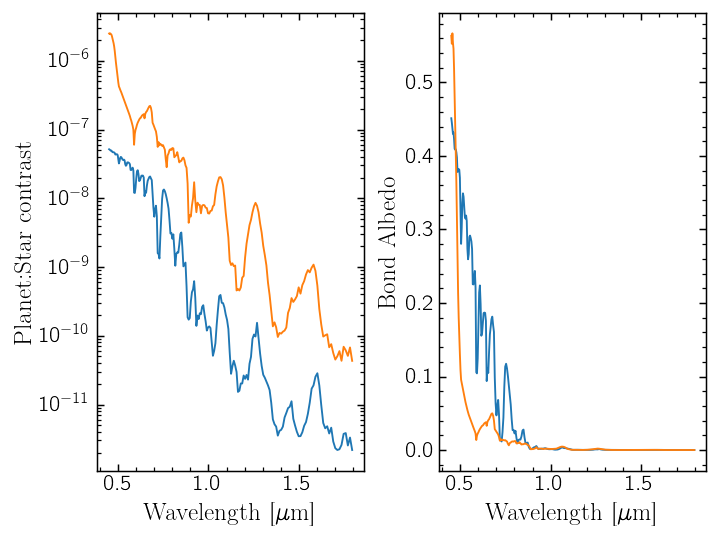

In [58]:
models = [cj_df, wj_df]

%matplotlib notebook
fig,axs = plt.subplots(nrows=1,ncols=2)
ax1 = axs[0]
ax1.set_yscale('log')
ax1.set_xlabel(r'Wavelength [$\mu$m]')
ax1.set_ylabel('Planet:Star contrast')
ax2 = axs[1]
ax2.set_xlabel(r'Wavelength [$\mu$m]')
ax2.set_ylabel('Bond Albedo')

for model in models:
    x,y = jdi.mean_regrid(1e4/model['wavenumber'], model['fpfs_reflected'],R=150)
    ax1.plot(x,y)
    x,y = jdi.mean_regrid(1e4/model['wavenumber'], model['albedo'],R=150)
    ax2.plot(x,y)

plt.tight_layout()

<IPython.core.display.Javascript object>


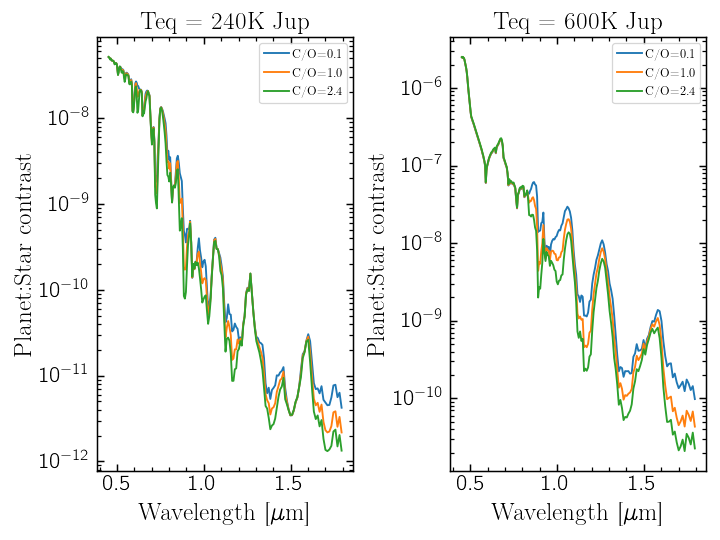

/Users/loganpearce/anaconda3/envs/py39/lib/python3.9/site-packages/picaso/atmsetup.py:190: UserWarning: Ignoring graphite in input file, not a recognized molecule
  warnings.warn("Ignoring %s in input file, not a recognized molecule" % i, UserWarning)
/Users/loganpearce/anaconda3/envs/py39/lib/python3.9/site-packages/picaso/atmsetup.py:190: UserWarning: Ignoring graphite in input file, not a recognized molecule
  warnings.warn("Ignoring %s in input file, not a recognized molecule" % i, UserWarning)
/Users/loganpearce/anaconda3/envs/py39/lib/python3.9/site-packages/picaso/atmsetup.py:190: UserWarning: Ignoring graphite in input file, not a recognized molecule
  warnings.warn("Ignoring %s in input file, not a recognized molecule" % i, UserWarning)
/Users/loganpearce/anaconda3/envs/py39/lib/python3.9/site-packages/picaso/atmsetup.py:190: UserWarning: Ignoring graphite in input file, not a recognized molecule
  warnings.warn("Ignoring %s in input file, not a recognized molecule" % i, UserW

In [65]:
cj = jdi.inputs()
cj.phase_angle(0)

## Selecing one from the GMagAO-X target list:

# HD 183263 b:
radius = 11.96 #Rearth
radius = radius*u.Rearth.to(u.Rjup)
sep = 1.508 #au
msinij = 3.704 #Mjup
Teq = 239.708

# Star:
StarTeff = 5875.99
cj.star(opa, StarTeff, 0, 4.0, semi_major = sep, semi_major_unit=jdi.u.Unit('au'))

cj.gravity(radius=radius, radius_unit=jdi.u.Unit('R_jup'), 
            mass = msinij, mass_unit=jdi.u.Unit('M_jup'))

#cj.atmosphere()
cj.guillot_pt(Teq)


# Warm jup:
wj = jdi.inputs()
wj.phase_angle(0)

## Selecing one from the GMagAO-X target list:

# HD 143761 b:
radius = 11.34 #Rearth
radius = radius*u.Rearth.to(u.Rjup)
sep = 0.23 #au
msinie = 349.613 #Mjup
Teq = 608.1

# Star:
StarTeff = 5777.0
wj.star(opa, StarTeff, 0, 4.0, semi_major = sep, semi_major_unit=jdi.u.Unit('au'))

wj.gravity(radius=radius, radius_unit=jdi.u.Unit('R_jup'), 
            mass = msinie, mass_unit=jdi.u.Unit('M_earth'))

#cj.atmosphere()
wj.guillot_pt(Teq)


cos = [0.1,1.0,2.4]
#co=1.0 #c/o ratio 1x solar
logfeh = 0.5 #10^0.5 ~ 3x solar
    

%matplotlib notebook
fig,axs = plt.subplots(nrows=1,ncols=2)
ax1 = axs[0]
ax1.set_yscale('log')
ax1.set_xlabel(r'Wavelength [$\mu$m]')
ax1.set_ylabel('Planet:Star contrast')
ax1.set_title('Teq = 240K Jup')
ax2 = axs[1]
ax2.set_yscale('log')
ax2.set_xlabel(r'Wavelength [$\mu$m]')
ax2.set_ylabel('Planet:Star contrast')
ax2.set_title('Teq = 600K Jup')

models = []
for co in cos:
    cj.chemeq_visscher(co,logfeh) #adds in template chemistry from sonora
    cj_df = cj.spectrum(opa, calculation='reflected light')
    models.append(cj_df)

for i,model in enumerate(models):
    x,y = jdi.mean_regrid(1e4/model['wavenumber'], model['fpfs_reflected'],R=150)
    ax1.plot(x,y, label='C/O='+str(cos[i]))
ax1.legend()
    
    
models = []
for co in cos:
    wj.chemeq_visscher(co,logfeh) #adds in template chemistry from sonora
    wj_df = wj.spectrum(opa, calculation='reflected light')
    models.append(wj_df)

for i,model in enumerate(models):
    x,y = jdi.mean_regrid(1e4/model['wavenumber'], model['fpfs_reflected'],R=150)
    ax2.plot(x,y, label='C/O='+str(cos[i]))
ax2.legend()

plt.tight_layout()

<IPython.core.display.Javascript object>


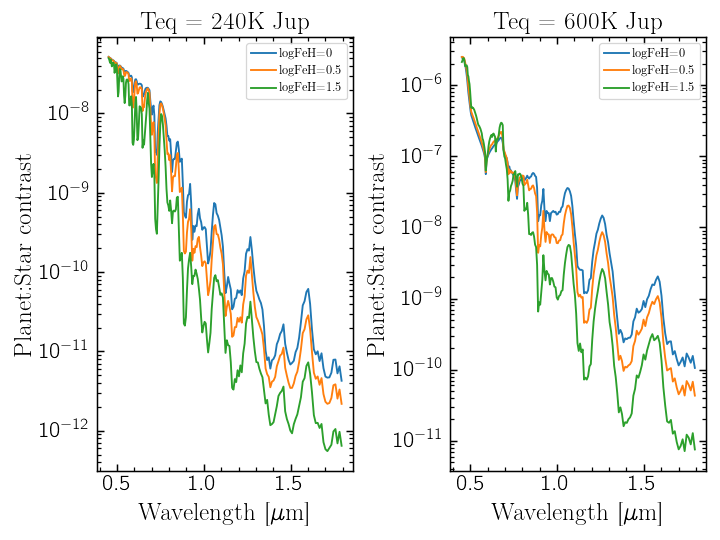

/Users/loganpearce/anaconda3/envs/py39/lib/python3.9/site-packages/picaso/atmsetup.py:190: UserWarning: Ignoring graphite in input file, not a recognized molecule
  warnings.warn("Ignoring %s in input file, not a recognized molecule" % i, UserWarning)
/Users/loganpearce/anaconda3/envs/py39/lib/python3.9/site-packages/picaso/atmsetup.py:190: UserWarning: Ignoring graphite in input file, not a recognized molecule
  warnings.warn("Ignoring %s in input file, not a recognized molecule" % i, UserWarning)
/Users/loganpearce/anaconda3/envs/py39/lib/python3.9/site-packages/picaso/atmsetup.py:190: UserWarning: Ignoring graphite in input file, not a recognized molecule
  warnings.warn("Ignoring %s in input file, not a recognized molecule" % i, UserWarning)
/Users/loganpearce/anaconda3/envs/py39/lib/python3.9/site-packages/picaso/atmsetup.py:190: UserWarning: Ignoring graphite in input file, not a recognized molecule
  warnings.warn("Ignoring %s in input file, not a recognized molecule" % i, UserW

In [68]:
cj = jdi.inputs()
cj.phase_angle(0)

## Selecing one from the GMagAO-X target list:

# HD 183263 b:
radius = 11.96 #Rearth
radius = radius*u.Rearth.to(u.Rjup)
sep = 1.508 #au
msinij = 3.704 #Mjup
Teq = 239.708

# Star:
StarTeff = 5875.99
cj.star(opa, StarTeff, 0, 4.0, semi_major = sep, semi_major_unit=jdi.u.Unit('au'))

cj.gravity(radius=radius, radius_unit=jdi.u.Unit('R_jup'), 
            mass = msinij, mass_unit=jdi.u.Unit('M_jup'))

#cj.atmosphere()
cj.guillot_pt(Teq)


# Warm jup:
wj = jdi.inputs()
wj.phase_angle(0)

## Selecing one from the GMagAO-X target list:

# HD 143761 b:
radius = 11.34 #Rearth
radius = radius*u.Rearth.to(u.Rjup)
sep = 0.23 #au
msinie = 349.613 #Mjup
Teq = 608.1

# Star:
StarTeff = 5777.0
wj.star(opa, StarTeff, 0, 4.0, semi_major = sep, semi_major_unit=jdi.u.Unit('au'))

wj.gravity(radius=radius, radius_unit=jdi.u.Unit('R_jup'), 
            mass = msinie, mass_unit=jdi.u.Unit('M_earth'))

#cj.atmosphere()
wj.guillot_pt(Teq)


#cos = [0.1,1.0,2.4]
co=1.0 #c/o ratio 1x solar
logfehs = [0,0.5,1.5] #10^0.5 ~ 3x solar
    

%matplotlib notebook
fig,axs = plt.subplots(nrows=1,ncols=2)
ax1 = axs[0]
ax1.set_yscale('log')
ax1.set_xlabel(r'Wavelength [$\mu$m]')
ax1.set_ylabel('Planet:Star contrast')
ax1.set_title('Teq = 240K Jup')
ax2 = axs[1]
ax2.set_yscale('log')
ax2.set_xlabel(r'Wavelength [$\mu$m]')
ax2.set_ylabel('Planet:Star contrast')
ax2.set_title('Teq = 600K Jup')

models = []
for logfeh in logfehs:
    cj.chemeq_visscher(co,logfeh) #adds in template chemistry from sonora
    cj_df = cj.spectrum(opa, calculation='reflected light')
    models.append(cj_df)

for i,model in enumerate(models):
    x,y = jdi.mean_regrid(1e4/model['wavenumber'], model['fpfs_reflected'],R=150)
    ax1.plot(x,y, label='logFeH='+str(logfehs[i]))
ax1.legend()
    
    
models = []
for logfeh in logfehs:
    wj.chemeq_visscher(co,logfeh) #adds in template chemistry from sonora
    wj_df = wj.spectrum(opa, calculation='reflected light')
    models.append(wj_df)

for i,model in enumerate(models):
    x,y = jdi.mean_regrid(1e4/model['wavenumber'], model['fpfs_reflected'],R=150)
    ax2.plot(x,y, label='logFeH='+str(logfehs[i]))
ax2.legend()

plt.tight_layout()